# Air quality data of Delhi, India

dataset Link: https://www.kaggle.com/datasets/deepaksirohiwal/delhi-air-quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r'C:\Users\dasav\Vamsi Reddy\datasets\delhi_aqi.csv')
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [4]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [6]:
data.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [7]:
data.shape

(18776, 9)

In [8]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [9]:
data.corr()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.914129,0.764201,-0.402284,0.534227,0.936830,0.950218,0.784951
no,0.914129,1.000000,0.557712,-0.354905,0.498719,0.816441,0.829910,0.724342
no2,0.764201,0.557712,1.000000,-0.343609,0.710371,0.701840,0.711998,0.718399
o3,-0.402284,-0.354905,-0.343609,1.000000,0.013204,-0.286661,-0.294825,-0.275983
so2,0.534227,0.498719,0.710371,0.013204,1.000000,0.488476,0.491889,0.628444
pm2_5,0.936830,0.816441,0.701840,-0.286661,0.488476,1.000000,0.989291,0.644446
pm10,0.950218,0.829910,0.711998,-0.294825,0.491889,0.989291,1.000000,0.686081
nh3,0.784951,0.724342,0.718399,-0.275983,0.628444,0.644446,0.686081,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [11]:
#finding any null values

data.isna().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [12]:
# removing unwanted columns from dataset
col_use=['no','no2','o3','so2','pm2_5','pm10','nh3','co']
data=data[col_use]

In [13]:
data.head()

,no,no2,o3,so2,pm2_5,pm10,nh3,co
0,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2616.88
1,23.25,89.11,0.33,54.36,420.96,486.21,41.04,3631.59
2,52.75,100.08,1.11,68.67,463.68,541.95,49.14,4539.49
3,50.96,111.04,6.44,78.20,454.81,534.00,48.13,4539.49
4,42.92,117.90,17.17,87.74,448.14,529.19,46.61,4379.27


In [14]:
data.tail()

,no,no2,o3,so2,pm2_5,pm10,nh3,co
18771,4.64,37.01,33.26,30.52,231.15,289.84,6.27,1762.39
18772,6.82,34.96,46.49,34.33,225.08,280.52,9.12,1735.69
18773,8.16,40.10,56.51,43.39,242.49,296.07,12.54,1922.61
18774,9.05,52.78,71.53,100.14,165.67,191.82,7.47,1361.85
18775,8.61,56.89,80.11,110.63,123.76,140.26,5.51,1134.87


In [15]:
data.shape

(18776, 8)

In [16]:
# finding null values after removing unwanted columns

data.isna().sum()

no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
co       0
dtype: int64

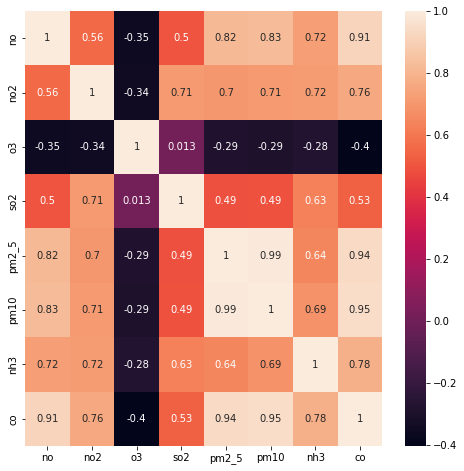

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

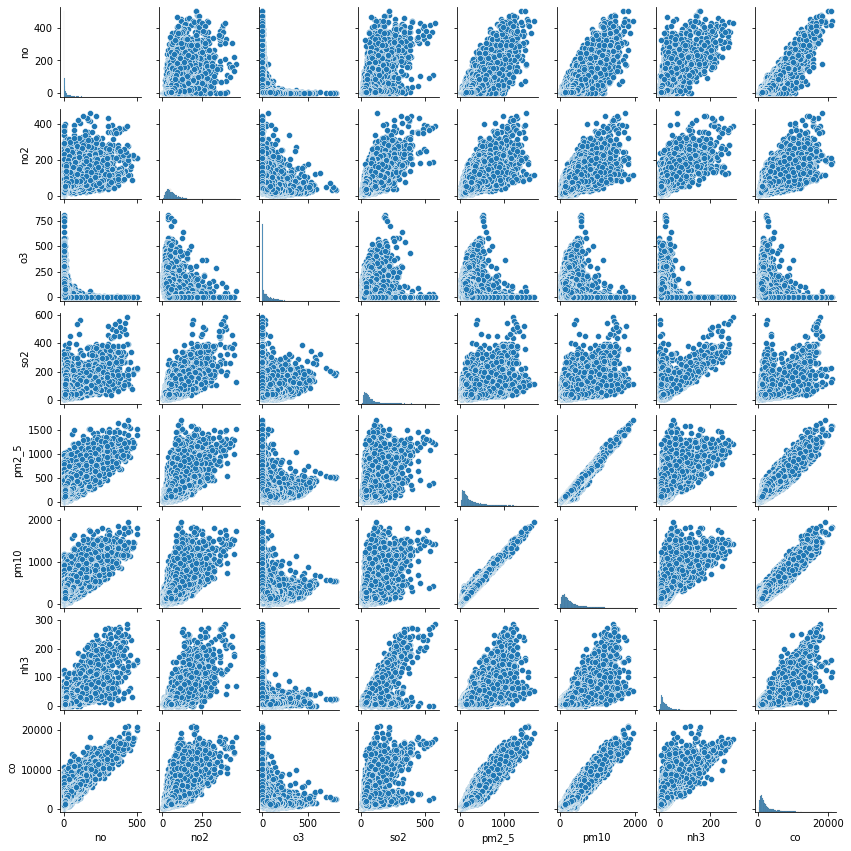

In [18]:
plt.figure(figsize=(10,10))
sns.pairplot(data,height=1.5)
plt.show()

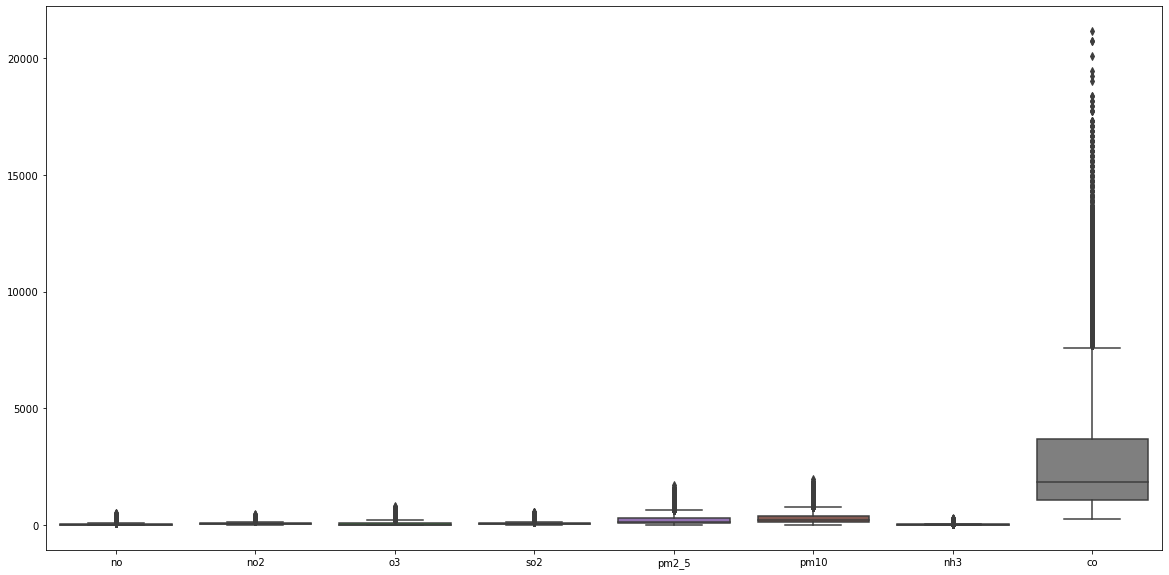

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

In [24]:
for cols in data.columns[:-1]:
    if data[cols].dtype == object:
        continue
    else:
        Q1 = data[cols].quantile(q=0.25)
        Q3 = data[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        data.loc[ (data[cols]>high)] = data[cols].median()

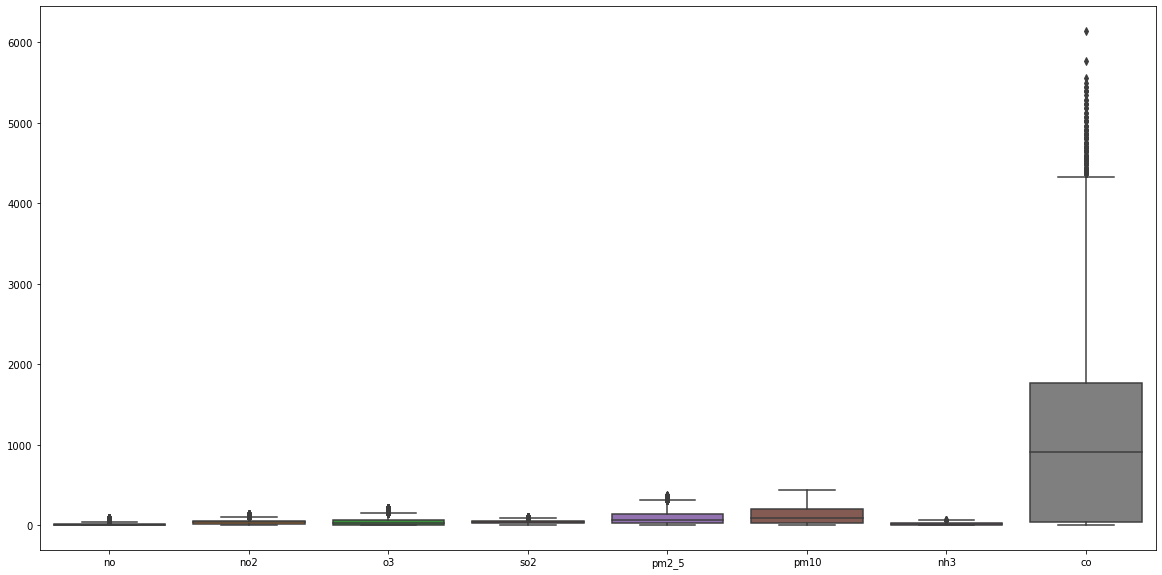

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

In [43]:
# dividing the dataset into independent and dependent variables

X=data['pm10'].values.reshape(-1,1)
Y=data['co'].values

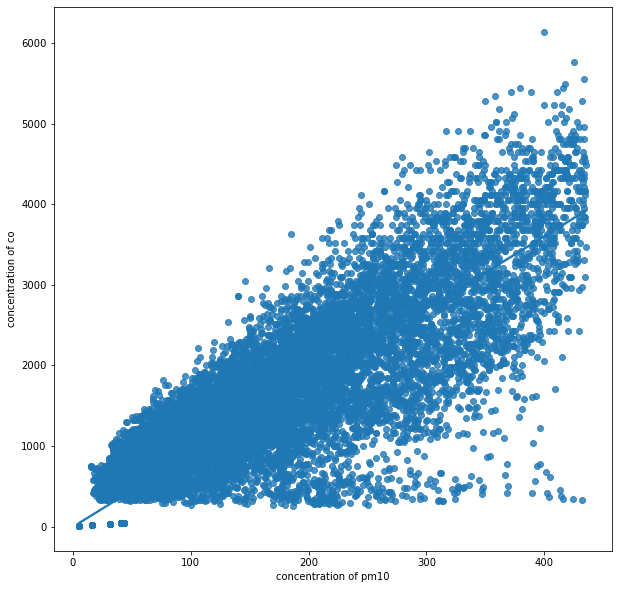

In [44]:
plt.figure(figsize=(10,10));
sns.regplot(X, Y);
plt.xlabel('concentration of pm10')
plt.ylabel("concentration of co")
plt.show();

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
print("training score is",model.score(X_train,y_train))

training score is 0.7967184939351699


In [34]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.7956719159553969


In [37]:
print("r2 score is ", r2_score(y_Pred,y_test))

r2 score is  0.7410127943196707


In [36]:
print("mean squared error is ", r2_score(y_Pred,y_test))

mean squared error is  0.7410127943196707


In [38]:
y_Pred=model.predict(X_test)

In [39]:
y_Pred

array([  44.16779145,  280.43102189,   44.16779145, ..., 2133.05192879,
        981.47142343, 1264.77104071])